# Problem Statement:
**1) Extract reviews of any product from ecommerce website like amazon**   
**2) Perform emotion mining**

In [1]:
#!pip install spacy
#!python -m spacy download en
#!pip install nltk
#!pip install wordcloud

import warnings
warnings.filterwarnings('ignore')

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wordnet
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

**web scraping and Python BeautifulSoup Parsing HTML**

In [4]:
boat_speaker_review = []
op=[]
for i in range (1,50):
    url = "https://www.amazon.in/product-reviews/B09JGRDGDG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber=1"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    boat_speaker_review = boat_speaker_review+op
boat_speaker_review

['\nI bought this soundbar to enhance my TV audio and I was impressed by the sound quality and the Dolby effect. The sound is clear, loud and immersive. The subwoofer adds a nice bass to the music and movies. The installation was easy and the remote control has different modes to adjust the sound.However, I also noticed some issues with this product. The soundbar gets very hot after a few minutes of use and I’m worried it might damage the device. The bluetooth range is not very good and sometimes the connection drops. The remote control only works if you point it directly at the soundbar, which is inconvenient. I wish they had improved these aspects of the product.Overall, I think this soundbar is good for its price but it has some flaws that need to be fixed.\n',
 '\nAwesome\n',
 '\nProduct is sleek and with decent sound out put .I had a Boat stone speaker before ,it had better output than this one even though stone was 20W RMS .Connectivity is good ,sound clarity would have been bett

**Text cleaning**

In [6]:
text1 = ' '.join(boat_speaker_review)
text1 = re.sub("[^A-Za-z" "]+"," ",text1).lower() #remove special character
text1 = re.sub("[0-9" "]+"," ",text1).lower() #remove numbers
text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text1).lower() #remove hyperlink
text1

' i bought this soundbar to enhance my tv audio and i was impressed by the sound quality and the dolby effect the sound is clear loud and immersive the subwoofer adds a nice bass to the music and movies the installation was easy and the remote control has different modes to adjust the sound however i also noticed some issues with this product the soundbar gets very hot after a few minutes of use and i m worried it might damage the device the bluetooth range is not very good and sometimes the connection drops the remote control only works if you point it directly at the soundbar which is inconvenient i wish they had improved these aspects of the product overall i think this soundbar is good for its price but it has some flaws that need to be fixed awesome product is sleek and with decent sound out put i had a boat stone speaker before it had better output than this one even though stone was w rms connectivity is good sound clarity would have been better but i would recommend this produc

In [7]:
#Punctuation
nltk.download('punkt')
nltk.download('stopwords')
text_tokens = word_tokenize(text1)
text_tokens 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'bought',
 'this',
 'soundbar',
 'to',
 'enhance',
 'my',
 'tv',
 'audio',
 'and',
 'i',
 'was',
 'impressed',
 'by',
 'the',
 'sound',
 'quality',
 'and',
 'the',
 'dolby',
 'effect',
 'the',
 'sound',
 'is',
 'clear',
 'loud',
 'and',
 'immersive',
 'the',
 'subwoofer',
 'adds',
 'a',
 'nice',
 'bass',
 'to',
 'the',
 'music',
 'and',
 'movies',
 'the',
 'installation',
 'was',
 'easy',
 'and',
 'the',
 'remote',
 'control',
 'has',
 'different',
 'modes',
 'to',
 'adjust',
 'the',
 'sound',
 'however',
 'i',
 'also',
 'noticed',
 'some',
 'issues',
 'with',
 'this',
 'product',
 'the',
 'soundbar',
 'gets',
 'very',
 'hot',
 'after',
 'a',
 'few',
 'minutes',
 'of',
 'use',
 'and',
 'i',
 'm',
 'worried',
 'it',
 'might',
 'damage',
 'the',
 'device',
 'the',
 'bluetooth',
 'range',
 'is',
 'not',
 'very',
 'good',
 'and',
 'sometimes',
 'the',
 'connection',
 'drops',
 'the',
 'remote',
 'control',
 'only',
 'works',
 'if',
 'you',
 'point',
 'it',
 'directly',
 'at',
 'the'

In [8]:
my_stopwords = pd.read_csv("stop.txt")
my_stopwords
no_stop_tokens = [word for word in text_tokens if not word in my_stopwords]
print(no_stop_tokens[0:30])

['i', 'bought', 'this', 'soundbar', 'to', 'enhance', 'my', 'tv', 'audio', 'and', 'i', 'was', 'impressed', 'by', 'the', 'sound', 'quality', 'and', 'the', 'dolby', 'effect', 'the', 'sound', 'is', 'clear', 'loud', 'and', 'immersive', 'the', 'subwoofer']


In [9]:
#Lowercase the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['i', 'bought', 'this', 'soundbar', 'to', 'enhance', 'my', 'tv', 'audio', 'and', 'i', 'was', 'impressed', 'by', 'the', 'sound', 'quality', 'and', 'the', 'dolby', 'effect', 'the', 'sound', 'is', 'clear']


In [10]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:30])

['i', 'bought', 'thi', 'soundbar', 'to', 'enhanc', 'my', 'tv', 'audio', 'and', 'i', 'wa', 'impress', 'by', 'the', 'sound', 'qualiti', 'and', 'the', 'dolbi', 'effect', 'the', 'sound', 'is', 'clear', 'loud', 'and', 'immers', 'the', 'subwoof']


In [11]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 5587967
doc = nlp(' '.join(lower_words))
print(doc[0:40])

i bought this soundbar to enhance my tv audio and i was impressed by the sound quality and the dolby effect the sound is clear loud and immersive the subwoofer adds nice bass to the music and movies the installation


In [12]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['I', 'buy', 'this', 'soundbar', 'to', 'enhance', 'my', 'tv', 'audio', 'and', 'I', 'be', 'impress', 'by', 'the', 'sound', 'quality', 'and', 'the', 'dolby', 'effect', 'the', 'sound', 'be', 'clear', 'loud', 'and', 'immersive', 'the', 'subwoofer', 'add', 'nice', 'bass', 'to', 'the', 'music', 'and', 'movie', 'the', 'installation']


# Feature Extraction

**TFidf vectorizer**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features = 40)
text_tf = tf.fit_transform(lemmas)
print(tf.get_feature_names_out())
print(text_tf.toarray())


['and' 'bass' 'be' 'bluetooth' 'but' 'clear' 'control' 'for' 'good' 'have'
 'if' 'in' 'it' 'look' 'mode' 'my' 'not' 'of' 'one' 'only' 'overall'
 'price' 'product' 'quality' 'remote' 'some' 'sound' 'soundbar' 'stone'
 'that' 'the' 'then' 'this' 'to' 'very' 'well' 'with' 'work' 'would' 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=tf.get_feature_names_out())
df

,and,bass,be,bluetooth,but,clear,control,for,good,have,...,the,then,this,to,very,well,with,work,would,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Generate wordcloud**

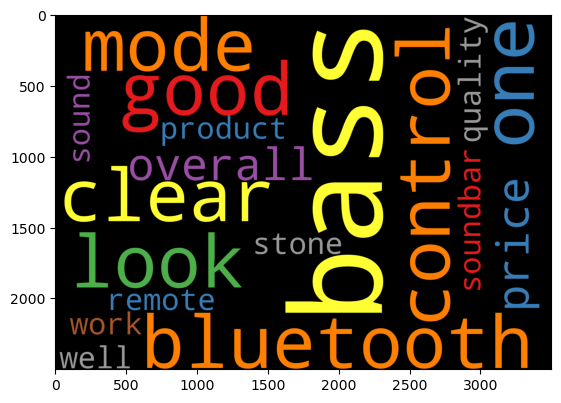

In [15]:
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
word_list = ' '.join(df)
   
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=250,
                      colormap='Set1').generate(word_list)
# Plot
plt.imshow(wordcloud)

# Sentiment Analysis

In [16]:
text2 = boat_speaker_review
text2 = [x.strip() for x in text2] # remove both the leading and the trailing characters
text2 = ' '.join(text2)
text2 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text2).lower() #remove hyperlink
text2 = re.sub("[0-9" "]+"," ",text2).lower() #remove numbers
text2 = re.sub("[^A-Za-z." "]+"," ",text2).lower() #remove special character
text2

'i bought this soundbar to enhance my tv audio and i was impressed by the sound quality and the dolby effect. the sound is clear loud and immersive. the subwoofer adds a nice bass to the music and movies. the installation was easy and the remote control has different modes to adjust the sound.however i also noticed some issues with this product. the soundbar gets very hot after a few minutes of use and i m worried it might damage the device. the bluetooth range is not very good and sometimes the connection drops. the remote control only works if you point it directly at the soundbar which is inconvenient. i wish they had improved these aspects of the product.overall i think this soundbar is good for its price but it has some flaws that need to be fixed. awesome product is sleek and with decent sound out put .i had a boat stone speaker before it had better output than this one even though stone was w rms .connectivity is good sound clarity would have been better but i would recommend th

In [17]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(text2)

#sentences[5:15]
sentences

['i bought this soundbar to enhance my tv audio and i was impressed by the sound quality and the dolby effect.',
 'the sound is clear loud and immersive.',
 'the subwoofer adds a nice bass to the music and movies.',
 'the installation was easy and the remote control has different modes to adjust the sound.however i also noticed some issues with this product.',
 'the soundbar gets very hot after a few minutes of use and i m worried it might damage the device.',
 'the bluetooth range is not very good and sometimes the connection drops.',
 'the remote control only works if you point it directly at the soundbar which is inconvenient.',
 'i wish they had improved these aspects of the product.overall i think this soundbar is good for its price but it has some flaws that need to be fixed.',
 'awesome product is sleek and with decent sound out put .i had a boat stone speaker before it had better output than this one even though stone was w rms .connectivity is good sound clarity would have bee

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,i bought this soundbar to enhance my tv audio ...
1,the sound is clear loud and immersive.
2,the subwoofer adds a nice bass to the music an...
3,the installation was easy and the remote contr...
4,the soundbar gets very hot after a few minutes...
...,...
13260,if you are looking a boom badd sound blaster s...
13261,that s better product design is good.
13262,sound quality is very good when connected with...
13263,that s d sound quality and bass good looks and...


In [19]:
#list of positive words
senti_pw = pd.read_csv('positive-words.txt', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1',
                   header = None)
senti_pw.drop(senti_pw.index[0:26], axis = 0, inplace = True)
senti_pw.columns = ["word"]
senti_pw['score'] = 1
senti_pw

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,word,score
26,a+,1
27,abound,1
28,abounds,1
29,abundance,1
30,abundant,1
...,...,...
2027,youthful,1
2028,zeal,1
2029,zenith,1
2030,zest,1


In [20]:
#list of negative words
senti_ng = pd.read_csv('negative-words.txt', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1',
                   header = None)
senti_ng.drop(senti_ng.index[0:26], axis = 0, inplace = True)
senti_ng.columns = ["word"]
senti_ng['score'] = -1
senti_ng

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,word,score
26,2-faced,-1
27,2-faces,-1
28,abnormal,-1
29,abolish,-1
30,abominable,-1
...,...,...
4804,zaps,-1
4805,zealot,-1
4806,zealous,-1
4807,zealously,-1


In [21]:
affinity_score = pd.concat([senti_pw, senti_ng], axis = 0)
affinity_scores = affinity_score.set_index('word')['score'].to_dict()
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [22]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [23]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,i bought this soundbar to enhance my tv audio ...,2,21
1,the sound is clear loud and immersive.,0,7
2,the subwoofer adds a nice bass to the music an...,1,11
3,the installation was easy and the remote contr...,0,23
4,the soundbar gets very hot after a few minutes...,-1,20
...,...,...,...
13260,if you are looking a boom badd sound blaster s...,7,51
13261,that s better product design is good.,2,7
13262,sound quality is very good when connected with...,1,14
13263,that s d sound quality and bass good looks and...,2,23


In [24]:
sent_df.sentiment_value.value_counts()

 1    4974
 2    2489
 0    1658
-1    1658
 8     829
 7     829
 4     828
Name: sentiment_value, dtype: int64

In [25]:
sent_df[sent_df['sentiment_value']==7]['sentence'].tolist()

['if you are looking a boom badd sound blaster soundbar then it s not for you but if you are looking a creamy smooth clear sound with good look handy soundbar then go for it .one year warranty.quality good build quality .sound overall good .price remote bluetooth bass look .function .',
 'if you are looking a boom badd sound blaster soundbar then it s not for you but if you are looking a creamy smooth clear sound with good look handy soundbar then go for it .one year warranty.quality good build quality .sound overall good .price remote bluetooth bass look .function .',
 'if you are looking a boom badd sound blaster soundbar then it s not for you but if you are looking a creamy smooth clear sound with good look handy soundbar then go for it .one year warranty.quality good build quality .sound overall good .price remote bluetooth bass look .function .',
 'if you are looking a boom badd sound blaster soundbar then it s not for you but if you are looking a creamy smooth clear sound with go

In [26]:
sent_df.drop_duplicates(keep='first', inplace=True)
sent_df

,sentence,sentiment_value,word_count
0,i bought this soundbar to enhance my tv audio ...,2,21
1,the sound is clear loud and immersive.,0,7
2,the subwoofer adds a nice bass to the music an...,1,11
3,the installation was easy and the remote contr...,0,23
4,the soundbar gets very hot after a few minutes...,-1,20
5,the bluetooth range is not very good and somet...,1,12
6,the remote control only works if you point it ...,1,16
7,i wish they had improved these aspects of the ...,1,29
8,awesome product is sleek and with decent sound...,8,48
9,sound quality is not good in normal eq but in ...,2,16


In [27]:
sent_df[sent_df['sentiment_value']==7]['sentence'].tolist()

['if you are looking a boom badd sound blaster soundbar then it s not for you but if you are looking a creamy smooth clear sound with good look handy soundbar then go for it .one year warranty.quality good build quality .sound overall good .price remote bluetooth bass look .function .']

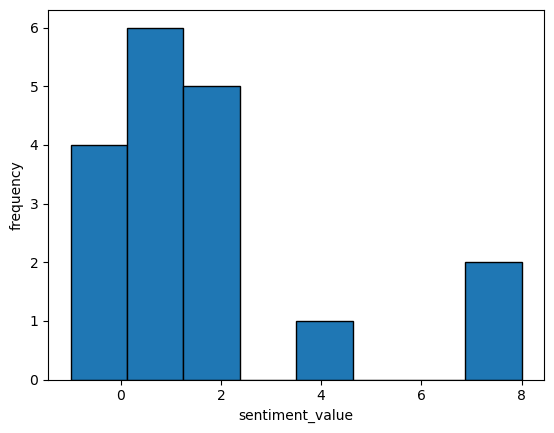

In [28]:
plt.hist(sent_df['sentiment_value'], edgecolor = "black", bins = 8)
plt.xlabel("sentiment_value")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

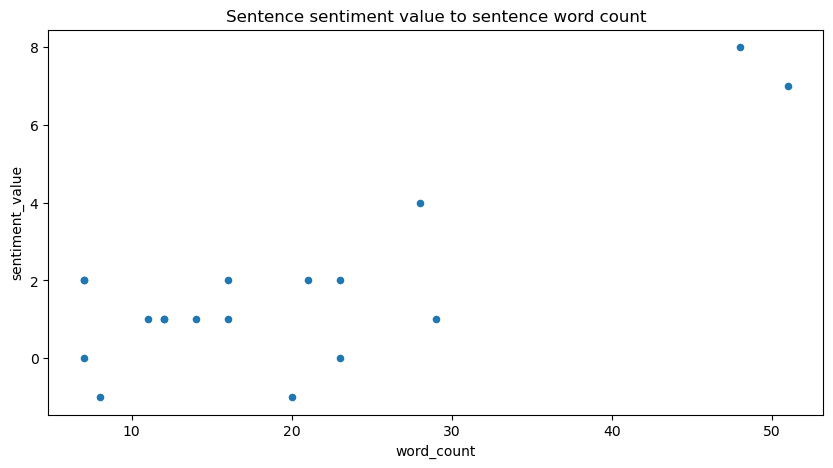

In [29]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,5),
                     title='Sentence sentiment value to sentence word count')

In [30]:
pw_txt = ' '.join(set(text_tokens).intersection(senti_pw.word))
ng_txt = ' '.join(set(text_tokens).intersection(senti_ng.word))
ng_txt

'issues flaws damage worried loud'

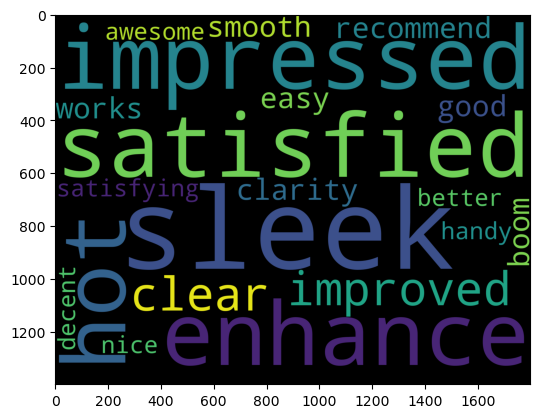

In [31]:
wordcloud_pw = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(pw_txt)
plt.imshow(wordcloud_pw)

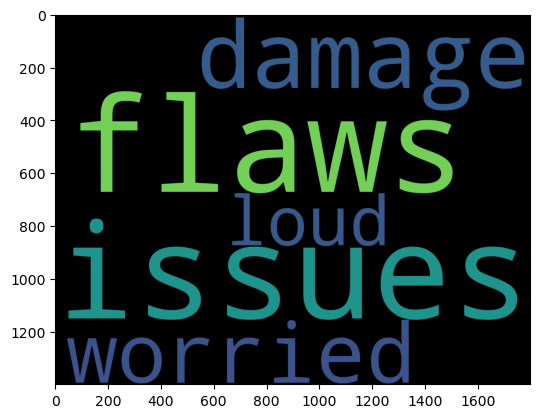

In [32]:
wordcloud_ng = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ng_txt)
plt.imshow(wordcloud_ng)

# Conclusion
**mostly positive sentiments towards the product**